# 11.1

In [1]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load digits dataset
digits = datasets.load_digits()

# Create features matrix
features = digits.data

# Create target vector
target = digits.target

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(
    pipeline, # Pipeline
    features, # Feature matrix
    target, # Target vector
    cv=kf, # Cross-validation technique
    scoring='accuracy', # Loss function
    n_jobs=-1 # Use all CPU scores
)

# Calculate mean
cv_results.mean()

0.9693916821849783

In [2]:
# View score for all 10 folds
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [3]:
# Import library
from sklearn.model_selection import train_test_split

# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# Fit standardizer to training set
standardizer.fit(features_train)

# Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

# Create a pipeline
pipeline = make_pipeline(standardizer, logit)

# Conduct k-fold cross-validation
cv_results = cross_val_score(
    pipeline, # Pipeline
    features, # Feature matrix
    target, # Target vector
    cv=kf, # Cross-validation technique
    scoring='accuracy', # Loss function
    n_jobs=-1 # Use all CPU scores
)

# 11.2

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Load libraries
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# Load data
boston = load_boston()

# Create features
features, target = boston.data, boston.target

# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')

# 'Train' dummy regressor
dummy.fit(features_train, target_train)

# Get R-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

In [3]:
# Load library
from sklearn.linear_model import LinearRegression

# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

# Get R-squared score
ols.score(features_test, target_test)

0.635463843320211

In [4]:
# Create dummy regressor that predicts 20's for everything
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# Evaluate score
clf.score(features_test, target_test)

-0.06510502029325727

# 11.3

In [5]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()

# Create features
features, target = iris.data, iris.target

# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# 'Train' model
dummy.fit(features_train, target_train)

# Get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

In [6]:
# Load library
from sklearn.ensemble import RandomForestClassifier

# Create classifier
classifier = RandomForestClassifier()

# Train model
classifier.fit(features_train, target_train)

# Get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

# 11.4

In [7]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
X, y = make_classification(n_samples=10000, n_features=3, n_informative=3, n_redundant=0, n_classes=2, random_state=1)

# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [8]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [9]:
# Cross-validate model using recall
cross_val_score(logit, X, y, scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [10]:
# Cross-validate model using f1
cross_val_score(logit, X, y, scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [11]:
# Load library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)

# Calculate accuracy
accuracy_score(y_test, y_hat)

0.947

# 11.5

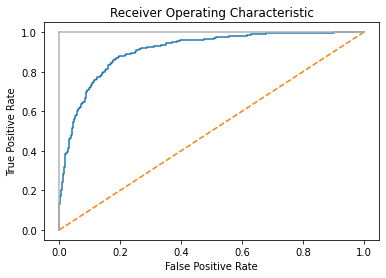

In [12]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Create feature matrix and target vector
features, target = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=3, random_state=3)

# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# Create classifier
logit = LogisticRegression()

# Train model
logit.fit(features_train, target_train)

# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# Create ture and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
# Get predicted probabilities
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [14]:
logit.classes_

array([0, 1])

In [15]:
print('Threshold:', threshold[116])
print('True Positive Rate:', true_positive_rate[116])
print('False Positive Rate:', false_positive_rate[116])

Threshold: 0.5331715230155316
True Positive Rate: 0.810204081632653
False Positive Rate: 0.14901960784313725


In [16]:
print('Threshold:', threshold[45])
print('True Positive Rate:', true_positive_rate[45])
print('False Positive Rate:', false_positive_rate[45])

Threshold: 0.818913387665929
True Positive Rate: 0.5448979591836735
False Positive Rate: 0.047058823529411764


In [17]:
# Calculate area under curve
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

# 11.6

In [1]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
features, target = make_classification(
    n_samples=10000, n_features=3, n_informative=3, n_redundant=0, n_classes=3, random_state=1
)

# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [2]:
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

# 11.7

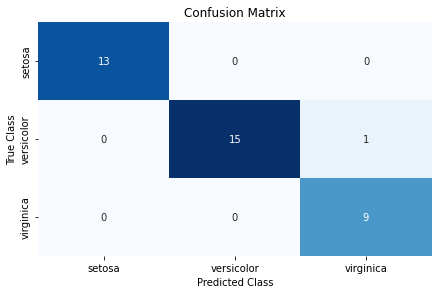

In [8]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

# 11.8

In [9]:
# Load libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Generate features matrix, target vector
features, target = make_regression(
    n_samples=100, n_features=3, n_informative=3, n_targets=1, noise=50, coef=False, random_state=1
)

# Create a linear regression object
ols = LinearRegression()

# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [10]:
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

# 11.9

In [11]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate feature matrix
features, _ = make_blobs(
    n_samples=1000, n_features=10, centers=2, cluster_std=0.5, shuffle=True, random_state=1
)

# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)

# Get predicted classes
target_predicted = model.labels_

# Evaluate model
silhouette_score(features, target_predicted)

0.8916265564072141

# 11.10

In [12]:
# Load libraries
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# Generate features matrix and target vector
features, target = make_regression(n_samples=100, n_features=3, random_state=1)

# Create training set and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.10, random_state=1)

# Create custom metric
def custom_metric(target_test, target_predicted):
    # Calcule r-squared score
    r2 = r2_score(target_test, target_predicted)
    # Return r-squared score
    return r2

# Make scorer and define that higher scores are better
score = make_scorer(custom_metric, greater_is_better=True)

# Create ridge regression object
classifier = Ridge()

# Train ridge regression model
model = classifier.fit(features_train, target_train)

# Apply custom scorer
score(model, features_test, target_test)

0.9997906102882058

In [13]:
# Predict values
target_predicted = model.predict(features_test)

# Calculate r-squared score
r2_score(target_test, target_predicted)

0.9997906102882058

# 11.11

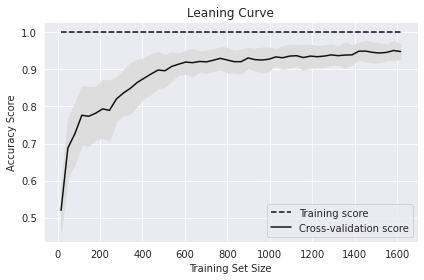

In [2]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# Load data
digits = load_digits()

# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), # Classifier
    features, # Feature matrix
    target, # Target vector
    cv=10, # Number of folds
    scoring='accuracy', # Performance metric
    n_jobs=-1, # Use all computer cores
    train_sizes=np.linspace(0.01, 1.0, 50) # Sizes of 50 training set
)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color='#111111', label='Training score')
plt.plot(train_sizes, test_mean, color='#111111', label='Cross-validation score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Create plot
plt.title('Leaning Curve')
plt.xlabel('Training Set Size'), plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 11.12

In [5]:
# Load libraries
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# Create a classification report
print(classification_report(target_test, target_predicted, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# 11.13

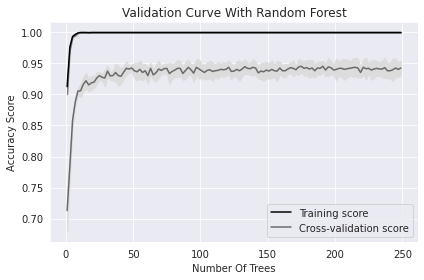

In [6]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# Load data
digits = load_digits()

# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), # Classifier
    features, # Feature matrix
    target, # Target vector
    param_name='n_estimators', # Hyperparameter to examine
    param_range=param_range, # Range of hyperparameter's values
    cv=3, # Number of folds
    scoring='accuracy', # Performance metric
    n_jobs=-1 # Use all computer cores
)

# Create mean and standard deviation of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create mean and standard deviation of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy score for training and test sets
plt.plot(param_range, train_mean, label='Training score', color='black')
plt.plot(param_range, test_mean, label='Cross-validation score', color='dimgrey')

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='gray')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='gainsboro')

# Create plot
plt.title('Validation Curve With Random Forest')
plt.xlabel('Number Of Trees'), plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc='best')
plt.show()